In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

if os.path.isfile('/content/drive/My Drive/Colab Notebooks/wdbc.dataset'):
  path = '/content/drive/My Drive/Colab Notebooks/wdbc.dataset'
else: 
  path ='wdbc.dataset'

In [7]:
## code for the locgictic Regression
import sklearn.datasets
import sklearn
import matplotlib.pyplot as plt
import numpy as np 

#logistic regression function
def logistic_func(beta,X,b): 
    return sigmoid(np.dot(beta,X)+b)

# calculate the predict value after traning
def pred_values(beta, X,b): 
    pred_prob = logistic_func(beta, X,b) 
    pred_value = np.where(pred_prob >= .5, 1, 0) 
    return np.squeeze(pred_value)
  

def CalculateTN(Actual_Y,Predict_Y):
  TN,FP,FN,TP = 0,0,0,0
  for i in range(len(Predict_Y)):
      if   Actual_Y[i] == 0 and Predict_Y[i] == 0:
           TN +=1
      elif Actual_Y[i] == 0 and Predict_Y[i] == 1:
           FP +=1
      elif Actual_Y[i] == 1 and Predict_Y[i] == 0:
           FN += 1
      elif Actual_Y[i] == 1 and Predict_Y[i] == 1:
           TP +=1
  #print(TN,FP,FN,TP)
  return TN,FP,FN,TP

def calAccuracy(Actual_y,Predict_y):
    TN,FP,FN,TP = CalculateTN(Actual_y,Predict_y)
    return (TN+TP)/(TN+FP+FN+TP)
    
def calPrecision(Actual_y,Predict_y):
    TN,FP,FN,TP = CalculateTN(Actual_y,Predict_y)
    return (TP)/(FP+TP)

def calRecall(Actual_y,Predict_y):
    TN,FP,FN,TP = CalculateTN(Actual_y,Predict_y)
    return (TP)/(FN+TP)   

  
  
def sigmoid(z):
        return 1/(1+np.exp(-z))

def Mynormalize(X):
    mins = np.min(X,axis = 0)
    #print('min',mins.shape)
    maxs = np.max(X,axis =0)
    #print('max',maxs.shape)
    rng = maxs-mins
    #print('rng',rng.shape) 
    norm_X =((X-mins)/rng)
    #print('nor_x',norm_X.shape)
    return norm_X

## code from lecture doc and recitation
def LogisticRegression(train_X,train_Y,vali_X,vali_Y,epochs,learning_rate):
    
    train_losstrack =[]
    train_accuracys =[]
    vali_accuracys = []
    vali_losstrack = []
    train_m = train_X.shape[1]
    vali_m = vali_X.shape[1]
    train_w =np.ones([train_X.shape[0],1])*0.01#np.random.randn(X.shape[0],1)*0.01
    print('W shape',train_w.shape)
    print('X shape',train_X.shape)
    train_b = 0
    for epoch in range(epochs):
        
        # process of training set
        train_z =np.dot( train_w.T, train_X)+ train_b
        train_a = sigmoid(train_z)
        
        
        train_cost = -np.sum(np.multiply(np.log( train_a), train_Y)+ np.multiply((1- train_Y),np.log(1- train_a)))/ train_m
        train_losstrack.append(np.squeeze( train_cost))
        train_accurcy = calAccuracy( train_Y[0],np.squeeze(np.where( train_a >= .5, 1, 0)))
        train_accuracys.append(train_accurcy)
        
        train_dz =  train_Y- train_a
        train_db = (-1/ train_m)* np.sum(train_dz)
        train_dw = (-1/ train_m)*np.dot( train_X, train_dz.T)      
        train_w =  train_w-learning_rate* train_dw
        train_b =  train_b-learning_rate* train_db
         
        
        ## to validate the data
        y_pred = pred_values(train_w.T,vali_X.T,train_b)
        yy = logistic_func(train_w.T,vali_X.T,train_b)
        vali_cost = -np.sum(np.multiply(np.log(yy), vali_Y[0])+ np.multiply((1- vali_Y[0]),np.log(1- yy)))/ vali_m
        vali_losstrack.append(np.squeeze(vali_cost))
        vali_accuracy = calAccuracy(vali_Y[0],y_pred)
        vali_accuracys.append( vali_accuracy )  
         
        
          
          
        
          
    return  train_w,train_b,train_losstrack,vali_losstrack,train_accuracys, vali_accuracys,train_accurcy,vali_accuracy
    

In [8]:
# read from the data set and then random select 80% for trainning,
# 10% for testing and 10% for validation 
data = pd.read_csv(path,header=None)
data = data.drop([0],axis=1)

# divide dataset
data_train = data.sample(frac = 0.8,random_state = 0)
data_rest  = data.drop(data_train.index)
data_vali = data_rest.sample(frac =0.5,random_state = 0)
data_test =  data_rest.drop(data_vali.index)

# check the shape
print('Training set: ',data_train.shape,'Validation set: ',data_vali.shape,'Testing set: ',data_test.shape)


Training set:  (455, 31) Validation set:  (57, 31) Testing set:  (57, 31)


In [9]:
## data_train data_vali data_test 

### data for training 
data_train_X  = data_train.drop([1],axis = 1)
print(data_train_X.shape)
data_train_Y = data_train[1].to_frame()
data_train_Y = data_train_Y.replace('M',0)
data_train_Y  = data_train_Y.replace('B',1)
print(data_train_Y.shape)

### data for validation
data_vali_X = data_vali.drop([1],axis = 1)
print(data_vali_X.shape)
data_vali_Y = data_vali[1].to_frame()
data_vali_Y = data_vali_Y.replace('M',0)
data_vali_Y = data_vali_Y.replace('B',1)
print(data_vali_Y.shape)

### data for testing
data_test_X = data_test.drop([1],axis = 1)
print(data_test_X.shape)
data_test_Y = data_test[1].to_frame()
data_test_Y = data_test_Y.replace('M',0)
data_test_Y = data_test_Y.replace('B',1)
print(data_test_Y.shape)


(455, 30)
(455, 1)
(57, 30)
(57, 1)
(57, 30)
(57, 1)


W shape (30, 1)
X shape (30, 455)
After  1000 epochs: 
     Train accuracy: 0.96
Validation accuracy: 0.96


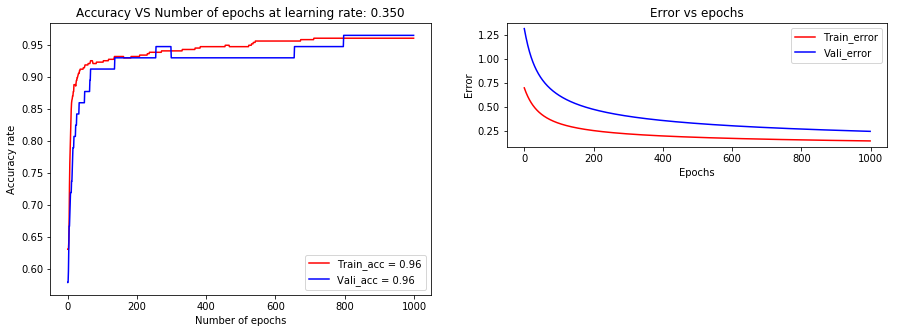

In [10]:
## for trainning 

### normalize the dataset and set up the epochs and learning rate
norm_data_train =  Mynormalize(data_train_X.values)
norm_data_vali = Mynormalize(data_vali_X.values)
epochs =1000
learning_rate = 0.35
### result after training and print out the cost history
w,b,train_losstrack,vali_losstrack,train_accuracys,vali_accuracys,train_accurcy,vali_accuracy = LogisticRegression(norm_data_train.T,data_train_Y.values.T,norm_data_vali,data_vali_Y.values.T,epochs,learning_rate)

print('After ',epochs,'epochs: ')
print("     Train accuracy: %.2f"%(train_accurcy))
print("Validation accuracy: %.2f"%(vali_accuracy))
## set up the graph for training accuracy vs number of epochs

plt.figure(figsize=(15,5))



plt.subplot(1,2,1)
plt.title("Accuracy VS Number of epochs at learning rate: %.3f"%(learning_rate))
plt.ylabel('Accuracy rate')
plt.xlabel('Number of epochs')
plt.plot(train_accuracys,'r',label ="Train_acc = %.2f"%(train_accurcy))
plt.plot(vali_accuracys,'b',label = "Vali_acc = %.2f"%(vali_accuracy))
plt.legend()



plt.subplot(2,2,2)
plt.title('Error vs epochs')
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.plot(train_losstrack,'r',label = "Train_error")
plt.plot(vali_losstrack,'b',label= "Vali_error")
plt.legend()



W shape (30, 1)
X shape (30, 455)
W shape (30, 1)
X shape (30, 455)
W shape (30, 1)
X shape (30, 455)
W shape (30, 1)
X shape (30, 455)
W shape (30, 1)
X shape (30, 455)
W shape (30, 1)
X shape (30, 455)
W shape (30, 1)
X shape (30, 455)
W shape (30, 1)
X shape (30, 455)
W shape (30, 1)
X shape (30, 455)
W shape (30, 1)
X shape (30, 455)
After  1000 epochs: 
     Train accuracy: 0.96
Validation accuracy: 0.96


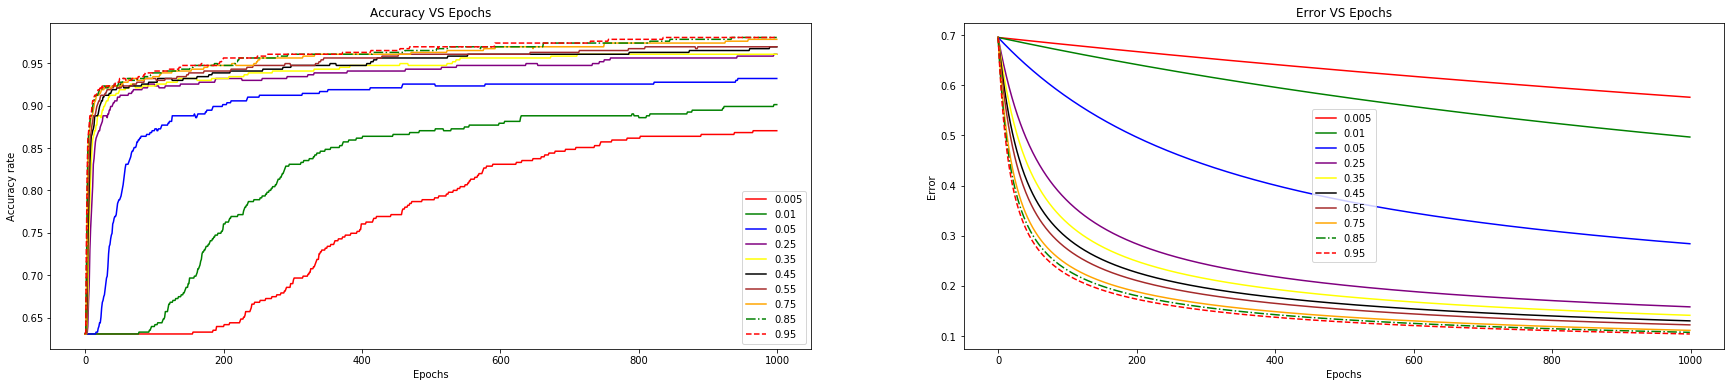

In [11]:
## for trainning 

### normalize the dataset and set up the epochs and learning rate
norm_data_train =  Mynormalize(data_train_X.values)
norm_data_vali = Mynormalize(data_vali_X.values)
epochs =1000
### result after training and print out the cost history

w1,b1,train_losstrack1,vali_losstrack1,train_accuracys1,vali_accuracys1,train_accurcy1,vali_accuracy1 = LogisticRegression(norm_data_train.T,data_train_Y.values.T,norm_data_vali,data_vali_Y.values.T,epochs,0.005)
w2,b2,train_losstrack2,vali_losstrack2,train_accuracys2,vali_accuracys2,train_accurcy2,vali_accuracy2 = LogisticRegression(norm_data_train.T,data_train_Y.values.T,norm_data_vali,data_vali_Y.values.T,epochs,0.01)
w3,b3,train_losstrack3,vali_losstrack3,train_accuracys3,vali_accuracys3,train_accurcy3,vali_accuracy3 = LogisticRegression(norm_data_train.T,data_train_Y.values.T,norm_data_vali,data_vali_Y.values.T,epochs,0.05)
w4,b4,train_losstrack4,vali_losstrack4,train_accuracys4,vali_accuracys4,train_accurcy4,vali_accuracy4 = LogisticRegression(norm_data_train.T,data_train_Y.values.T,norm_data_vali,data_vali_Y.values.T,epochs,0.25)
w5,b5,train_losstrack5,vali_losstrack5,train_accuracys5,vali_accuracys5,train_accurcy5,vali_accuracy5 = LogisticRegression(norm_data_train.T,data_train_Y.values.T,norm_data_vali,data_vali_Y.values.T,epochs,0.35)
w6,b6,train_losstrack6,vali_losstrack6,train_accuracys6,vali_accuracys6,train_accurcy6,vali_accuracy6 = LogisticRegression(norm_data_train.T,data_train_Y.values.T,norm_data_vali,data_vali_Y.values.T,epochs,0.45)
w7,b7,train_losstrack7,vali_losstrack7,train_accuracys7,vali_accuracys7,train_accurcy7,vali_accuracy7 = LogisticRegression(norm_data_train.T,data_train_Y.values.T,norm_data_vali,data_vali_Y.values.T,epochs,0.55)
w8,b8,train_losstrack8,vali_losstrack8,train_accuracys8,vali_accuracys8,train_accurcy8,vali_accuracy8 = LogisticRegression(norm_data_train.T,data_train_Y.values.T,norm_data_vali,data_vali_Y.values.T,epochs,0.75)
w9,b9,train_losstrack9,vali_losstrack9,train_accuracys9,vali_accuracys9,train_accurcy9,vali_accuracy9 = LogisticRegression(norm_data_train.T,data_train_Y.values.T,norm_data_vali,data_vali_Y.values.T,epochs,0.85)
w10,b10,train_losstrack10,vali_losstrack10,train_accuracys10,vali_accuracys10,train_accurcy10,vali_accuracy10 = LogisticRegression(norm_data_train.T,data_train_Y.values.T,norm_data_vali,data_vali_Y.values.T,epochs,0.95)


plt.figure(figsize=(30,6))
plt.subplot(1,2,1)
plt.title('Accuracy VS Epochs')
plt.ylabel('Accuracy rate')
plt.xlabel('Epochs')


print('After ',epochs,'epochs: ')
print("     Train accuracy: %.2f"%(train_accurcy))
print("Validation accuracy: %.2f"%(vali_accuracy))
## set up the graph for training accuracy vs number of epochs


plt.plot(train_accuracys1,'red',label = '0.005')
plt.plot(train_accuracys2,'green',label = '0.01')
plt.plot(train_accuracys3,'blue',label = '0.05')
plt.plot(train_accuracys4,'purple',label = '0.25')
plt.plot(train_accuracys5,'yellow',label = '0.35')
plt.plot(train_accuracys6,'black',label = '0.45')
plt.plot(train_accuracys7,'brown',label = '0.55')
plt.plot(train_accuracys8,'orange',label = '0.75')
plt.plot(train_accuracys9,'-.g',label = '0.85')
plt.plot(train_accuracys10,'--r',label = '0.95')
plt.legend()

plt.subplot(1,2,2)
plt.title('Error VS Epochs')
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.plot(train_losstrack1,'red',label = '0.005')
plt.plot(train_losstrack2,'green',label = '0.01')
plt.plot(train_losstrack3,'blue',label = '0.05')
plt.plot(train_losstrack4,'purple',label = '0.25')
plt.plot(train_losstrack5,'yellow',label = '0.35')
plt.plot(train_losstrack6,'black',label = '0.45')
plt.plot(train_losstrack7,'brown',label = '0.55')
plt.plot(train_losstrack8,'orange',label = '0.75')
plt.plot(train_losstrack9,'-.g',label = '0.85')
plt.plot(train_losstrack10,'--r',label = '0.95')
plt.legend()



In [7]:
## for testing 
## the best learning is 0.35
norm_data_test_X = Mynormalize(data_test_X.values)


print('The best learning rate is 0.35')
  
print('---------------------')
print('Learning Rate = 0.005')
y_pred = pred_values(w1.T,norm_data_test_X.T,b1)
print("Correctly predicted labels:", np.sum(data_test_Y.T.values == y_pred))

##Accuracy
print(" Accuracy: %.2f"%(calAccuracy(data_test_Y.T.values[0],y_pred)*100),'%')
print("Precision: %.2f"%(calPrecision(data_test_Y.T.values[0],y_pred)*100),'%')
print("   Recall: %.2f"%(calRecall(data_test_Y.T.values[0],y_pred)*100),'%')

print('---------------------')
print('Learning Rate = 0.01')
y_pred = pred_values(w2.T,norm_data_test_X.T,b2)
print("Correctly predicted labels:", np.sum(data_test_Y.T.values == y_pred))

##Accuracy
print(" Accuracy: %.2f"%(calAccuracy(data_test_Y.T.values[0],y_pred)*100),'%')
print("Precision: %.2f"%(calPrecision(data_test_Y.T.values[0],y_pred)*100),'%')
print("   Recall: %.2f"%(calRecall(data_test_Y.T.values[0],y_pred)*100),'%')

print('---------------------')
print('Learning Rate = 0.05')
y_pred = pred_values(w3.T,norm_data_test_X.T,b3)
print("Correctly predicted labels:", np.sum(data_test_Y.T.values == y_pred))

##Accuracy
print(" Accuracy: %.2f"%(calAccuracy(data_test_Y.T.values[0],y_pred)*100),'%')
print("Precision: %.2f"%(calPrecision(data_test_Y.T.values[0],y_pred)*100),'%')
print("   Recall: %.2f"%(calRecall(data_test_Y.T.values[0],y_pred)*100),'%')
print('---------------------')
print('Learning Rate = 0.25')
y_pred = pred_values(w4.T,norm_data_test_X.T,b4)
print("Correctly predicted labels:", np.sum(data_test_Y.T.values == y_pred))

##Accuracy
print(" Accuracy: %.2f"%(calAccuracy(data_test_Y.T.values[0],y_pred)*100),'%')
print("Precision: %.2f"%(calPrecision(data_test_Y.T.values[0],y_pred)*100),'%')
print("   Recall: %.2f"%(calRecall(data_test_Y.T.values[0],y_pred)*100),'%')

print('---------------------')
print('Learning Rate = 0.35')
y_pred = pred_values(w5.T,norm_data_test_X.T,b5)
print("Correctly predicted labels:", np.sum(data_test_Y.T.values == y_pred))

##Accuracy
print(" Accuracy: %.2f"%(calAccuracy(data_test_Y.T.values[0],y_pred)*100),'%')
print("Precision: %.2f"%(calPrecision(data_test_Y.T.values[0],y_pred)*100),'%')
print("   Recall: %.2f"%(calRecall(data_test_Y.T.values[0],y_pred)*100),'%')

print('---------------------')
print('Learning Rate = 0.45')
y_pred = pred_values(w6.T,norm_data_test_X.T,b6)
print("Correctly predicted labels:", np.sum(data_test_Y.T.values == y_pred))

##Accuracy
print(" Accuracy: %.2f"%(calAccuracy(data_test_Y.T.values[0],y_pred)*100),'%')
print("Precision: %.2f"%(calPrecision(data_test_Y.T.values[0],y_pred)*100),'%')
print("   Recall: %.2f"%(calRecall(data_test_Y.T.values[0],y_pred)*100),'%')
print('---------------------')
print('Learning Rate = 0.55')
y_pred = pred_values(w7.T,norm_data_test_X.T,b7)
print("Correctly predicted labels:", np.sum(data_test_Y.T.values == y_pred))

##Accuracy
print(" Accuracy: %.2f"%(calAccuracy(data_test_Y.T.values[0],y_pred)*100),'%')
print("Precision: %.2f"%(calPrecision(data_test_Y.T.values[0],y_pred)*100),'%')
print("   Recall: %.2f"%(calRecall(data_test_Y.T.values[0],y_pred)*100),'%')

print('---------------------')
print('Learning Rate = 0.75')
y_pred = pred_values(w8.T,norm_data_test_X.T,b8)
print("Correctly predicted labels:", np.sum(data_test_Y.T.values == y_pred))

##Accuracy
print(" Accuracy: %.2f"%(calAccuracy(data_test_Y.T.values[0],y_pred)*100),'%')
print("Precision: %.2f"%(calPrecision(data_test_Y.T.values[0],y_pred)*100),'%')
print("   Recall: %.2f"%(calRecall(data_test_Y.T.values[0],y_pred)*100),'%')

print('---------------------')
print('Learning Rate = 0.85')
y_pred = pred_values(w9.T,norm_data_test_X.T,b9)
print("Correctly predicted labels:", np.sum(data_test_Y.T.values == y_pred))

##Accuracy
print(" Accuracy: %.2f"%(calAccuracy(data_test_Y.T.values[0],y_pred)*100),'%')
print("Precision: %.2f"%(calPrecision(data_test_Y.T.values[0],y_pred)*100),'%')
print("   Recall: %.2f"%(calRecall(data_test_Y.T.values[0],y_pred)*100),'%')

print('---------------------')
print('Learning Rate = 0.95')
y_pred = pred_values(w10.T,norm_data_test_X.T,b10)
print("Correctly predicted labels:", np.sum(data_test_Y.T.values == y_pred))

##Accuracy
print(" Accuracy: %.2f"%(calAccuracy(data_test_Y.T.values[0],y_pred)*100),'%')
print("Precision: %.2f"%(calPrecision(data_test_Y.T.values[0],y_pred)*100),'%')
print("   Recall: %.2f"%(calRecall(data_test_Y.T.values[0],y_pred)*100),'%')



  

The best learning rate is 0.35
---------------------
Learning Rate = 0.005
Correctly predicted labels: 53
 Accuracy: 92.98 %
Precision: 90.24 %
   Recall: 100.00 %
---------------------
Learning Rate = 0.01
Correctly predicted labels: 54
 Accuracy: 94.74 %
Precision: 92.50 %
   Recall: 100.00 %
---------------------
Learning Rate = 0.05
Correctly predicted labels: 55
 Accuracy: 96.49 %
Precision: 97.30 %
   Recall: 97.30 %
---------------------
Learning Rate = 0.25
Correctly predicted labels: 57
 Accuracy: 100.00 %
Precision: 100.00 %
   Recall: 100.00 %
---------------------
Learning Rate = 0.35
Correctly predicted labels: 57
 Accuracy: 100.00 %
Precision: 100.00 %
   Recall: 100.00 %
---------------------
Learning Rate = 0.45
Correctly predicted labels: 57
 Accuracy: 100.00 %
Precision: 100.00 %
   Recall: 100.00 %
---------------------
Learning Rate = 0.55
Correctly predicted labels: 57
 Accuracy: 100.00 %
Precision: 100.00 %
   Recall: 100.00 %
---------------------
Learning Rate =